<h1>Task2: Customised Inception Model (Mini GoogleNet)
    - Classification Task</h1>

<h2>Step1 Import required packages</h2>

In [1]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-14 00:11:13.515512: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 00:11:13.777119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-14 00:11:13.831429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-14 00:11:13.848828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-14 00:11:14.115307: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import keras
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import numpy as np
from keras.datasets import cifar10
from keras import backend as K
from keras import utils
#from keras.utils import np_utils

import math
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [3]:
pip install pydot

  Using cached pydot-4.0.0-py3-none-any.whl.metadata (10 kB)
Using cached pydot-4.0.0-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.


<h2>Step2:Data Preparation</h2>

In [4]:
# # zip the foler
# local_zip = 'dataset_42028assg2_25428842.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./dataset')
# zip_ref.close()

In [5]:
# !pip install split-folders

In [6]:
# Define input data directory and output directory
input_folder = "dataset/Image_Classification/dataset_25428842"

In [7]:
output_folder = "dataset/Image_Classification/Split_Image_Classification"

In [8]:
# import splitfolders

In [9]:
# # Split the dataset into 80% training 10% validation and 10% testing
# splitfolders.ratio(input_folder, output=output_folder, seed=25428842, ratio=(0.8, 0.1,0.1), group_prefix=None, move=False)

In [10]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)


In [11]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (50.0 MB)


In [12]:
!pip uninstall -y opencv-python opencv-contrib-python opencv-python-headless
!pip install opencv-python-headless

Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86
Found existing installation: opencv-python-headless 4.11.0.86
Uninstalling opencv-python-headless-4.11.0.86:
  Successfully uninstalled opencv-python-headless-4.11.0.86
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (50.0 MB)


In [13]:
import cv2

In [14]:
from dataclasses import dataclass

import os
import numpy as np


In [15]:
data_dir = "dataset/Image_Classification/Split_Image_Classification/train" 

In [16]:
import matplotlib.pyplot as plt

(224, 224, 3)


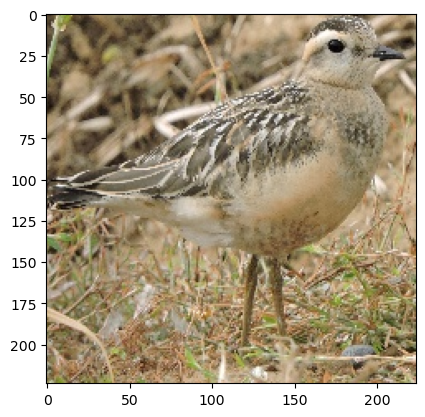

In [17]:
example_path = 'dataset/Image_Classification/dataset_25428842/INLAND DOTTEREL/09.jpg'
os.path.isfile(example_path)
img = cv2.imread(example_path)
print(img.shape)
plt.imshow(img[..., ::-1])

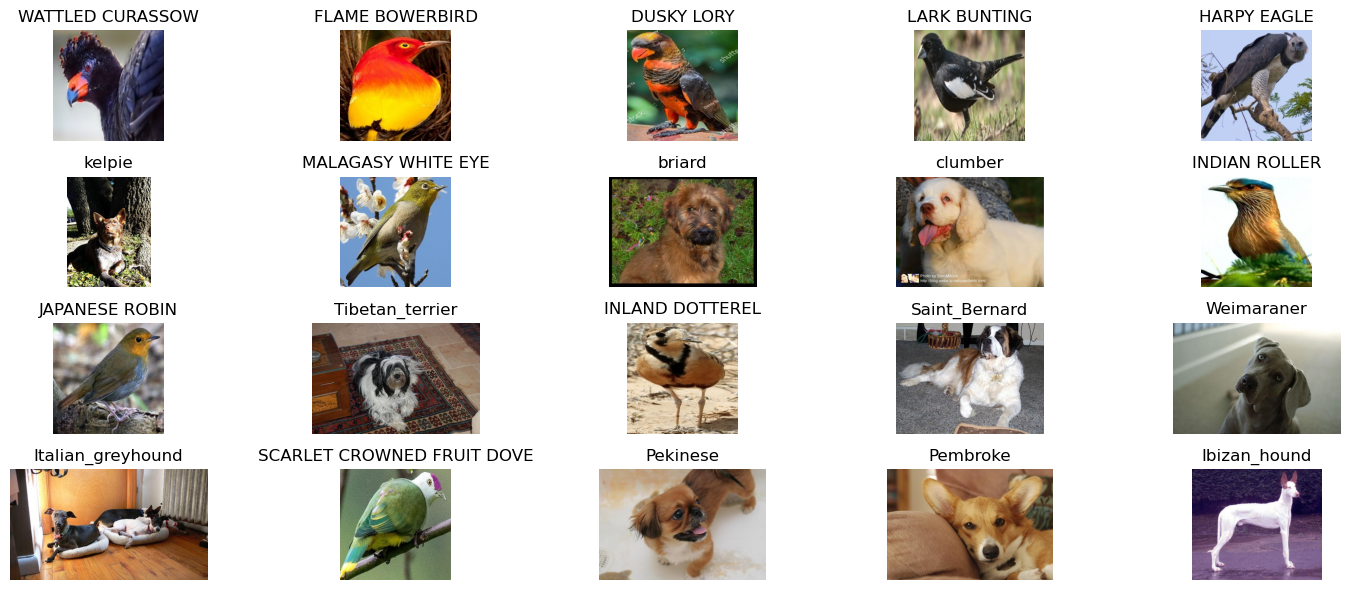

In [18]:

import os
import cv2
import matplotlib.pyplot as plt
import random

# Path to the dataset containing class subfolders
dataset_path = 'dataset/Image_Classification/dataset_25428842/'

# Get a list of class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Randomly select 10 different classes
selected_classes = random.sample(class_dirs, 20)

# Create a plot
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, class_name in enumerate(selected_classes):
    class_path = os.path.join(dataset_path, class_name)
    
    # List image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if image_files:
        # Pick one image (you can randomize this as well)
        img_file = random.choice(image_files)
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        
        if img is not None:
            row = i // 5
            col = i % 5
            axes[row, col].imshow(img[..., ::-1])  # Convert BGR to RGB
            axes[row, col].axis('off')
            axes[row, col].set_title(class_name)
        else:
            print(f"Could not read image: {img_path}")
    else:
        print(f"No images found in class: {class_name}")

plt.tight_layout()
plt.show()

In [17]:
#resize the image into same size

img_size=(64,64)

images_train = [] #initializing Lists for Storing Data
labels_train = []  #initializing Lists for Storing corresponsing labels
class_names=os.listdir(data_dir)  #List all folders inside train dicrectory, and stores folders names into class_names

print(class_names) # print all the class names which represent labels

for folder in os.listdir(data_dir): #Loop goes through each folder(class) inside data_dir
  folder_path=os.path.join(data_dir,folder) # folder_path stores the full path to the class folder.
  # print(folder_path)
  if not os.path.isdir(folder_path): # if path is not a folder, print out Not Processing and skps it
    print(f"Not Processing : {folder_path}")
    continue
      
  for file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, file)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # resize to fixed size
            images_train.append(img)
            labels_train.append(folder)
                
images_train = np.array(images_train)
labels_train = np.array(labels_train)

print(np.shape(images_train))
print(np.shape(labels_train))

['DUSKY LORY', 'FLAME BOWERBIRD', 'HARPY EAGLE', 'INDIAN ROLLER', 'INLAND DOTTEREL', 'Ibizan_hound', 'Italian_greyhound', 'JAPANESE ROBIN', 'LARK BUNTING', 'MALAGASY WHITE EYE', 'Pekinese', 'Pembroke', 'SCARLET CROWNED FRUIT DOVE', 'Saint_Bernard', 'Tibetan_terrier', 'WATTLED CURASSOW', 'Weimaraner', 'briard', 'clumber', 'kelpie']
(2584, 64, 64, 3)
(2584,)


In [18]:
print(class_names)

['DUSKY LORY', 'FLAME BOWERBIRD', 'HARPY EAGLE', 'INDIAN ROLLER', 'INLAND DOTTEREL', 'Ibizan_hound', 'Italian_greyhound', 'JAPANESE ROBIN', 'LARK BUNTING', 'MALAGASY WHITE EYE', 'Pekinese', 'Pembroke', 'SCARLET CROWNED FRUIT DOVE', 'Saint_Bernard', 'Tibetan_terrier', 'WATTLED CURASSOW', 'Weimaraner', 'briard', 'clumber', 'kelpie']


In [19]:
val_dir = "dataset/Image_Classification/Split_Image_Classification/val"


images_val = []
labels_val = []
class_names=os.listdir(val_dir)

print(class_names)

for folder in os.listdir(val_dir):
  folder_path=os.path.join(val_dir,folder)

  if not os.path.isdir(folder_path):
    print(f"Not Processing : {folder_path}")
    continue

  for file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, file)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # resize to fixed size
            images_val.append(img)
            labels_val.append(folder)

images_val = np.array(images_val)
labels_val = np.array(labels_val)

print(np.shape(images_val))
print(np.shape(labels_val))

['DUSKY LORY', 'FLAME BOWERBIRD', 'HARPY EAGLE', 'INDIAN ROLLER', 'INLAND DOTTEREL', 'Ibizan_hound', 'Italian_greyhound', 'JAPANESE ROBIN', 'LARK BUNTING', 'MALAGASY WHITE EYE', 'Pekinese', 'Pembroke', 'SCARLET CROWNED FRUIT DOVE', 'Saint_Bernard', 'Tibetan_terrier', 'WATTLED CURASSOW', 'Weimaraner', 'briard', 'clumber', 'kelpie']
(316, 64, 64, 3)
(316,)


In [20]:
#  Load the image data and classes from test Folder into testing Dataset.

In [21]:
test_dir = "dataset/Image_Classification/Split_Image_Classification/test"


images_test = []
labels_test = []
class_names=os.listdir(test_dir)

print(class_names)

for folder in os.listdir(test_dir):
  folder_path=os.path.join(test_dir,folder)

  if not os.path.isdir(folder_path):
    print(f"Not Processing : {folder_path}")
    continue

  for file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, file)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # resize to fixed size
            images_test.append(img)
            labels_test.append(folder)
            
images_test = np.array(images_test)
labels_test = np.array(labels_test)

print(np.shape(images_test))
print(np.shape(labels_test))

['DUSKY LORY', 'FLAME BOWERBIRD', 'HARPY EAGLE', 'INDIAN ROLLER', 'INLAND DOTTEREL', 'Ibizan_hound', 'Italian_greyhound', 'JAPANESE ROBIN', 'LARK BUNTING', 'MALAGASY WHITE EYE', 'Pekinese', 'Pembroke', 'SCARLET CROWNED FRUIT DOVE', 'Saint_Bernard', 'Tibetan_terrier', 'WATTLED CURASSOW', 'Weimaraner', 'briard', 'clumber', 'kelpie']
(341, 64, 64, 3)
(341,)


In [22]:
print(np.shape(images_train))
print(np.shape(images_val))
print(np.shape(images_test))

(2584, 64, 64, 3)
(316, 64, 64, 3)
(341, 64, 64, 3)


In [23]:
# Using ImageDataGenerator for data augmentation

In [24]:
train_dir=data_dir

In [25]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      brightness_range=[0.8, 1.2],
      channel_shift_range=0.2,
      fill_mode='nearest')

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=8,
        class_mode='categorical')  # Because it is multiclass, use as categorical

Found 2584 images belonging to 20 classes.


In [29]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical')

Found 316 images belonging to 20 classes.


In [30]:
# Flow validation images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical',
        shuffle=False)

Found 341 images belonging to 20 classes.


In [31]:
# Import required package for Inception-GoogleNet

In [32]:
import keras
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2
import numpy as np
from keras.datasets import cifar10
from keras import backend as K
from keras import utils
#from keras.utils import np_utils

import math
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [33]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


<h2>Step3: Implement Customised Inception Model 
    (Mini GoogleNet), 
    together with Checkpoint and Early Stop</h2>

In [34]:
num_classes = 20 #Number of classes in the dataset
from keras.utils import to_categorical


In [35]:
# Create the Inception module
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    # 1X1 CONV
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

    # 1X1 CONV --> 3x3 CONV
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    # 1X1 CONV --> 5x5 CONV
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    # 3X3 MAXPOOL --> 1X1 CONV
    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    # Concatenate the layers
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

In [36]:
# Define the input layer
input_layer = Input(shape=(64, 64, 3))

kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)
# Add the first CONV layer and MaxPOOL layer

x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_1_3x3-2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(1, 1), name='max_pool_1_3x3-2')(x)

## Add Inception layer-1
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')
x = Dropout(0.3)(x)

## Add Inception layer-2
x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')
x = Dropout(0.5)(x)

## Add MaxPool
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3-2')(x)

## Add Inception layer-3
x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')
x = Dropout(0.4)(x)

## Add Inception layer-4
x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3-1')(x)


x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)


x = Dense(20, activation='softmax', name='output')(x)

I0000 00:00:1747181513.133424    1974 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747181513.696047    1974 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747181513.701429    1974 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747181513.706208    1974 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [37]:
# Form the Model
model2 = Model(input_layer, x, name='inception_v1')

In [38]:
# Print Model Summary
model2.summary()

Model: "inception_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1_3x3-2        │ (None, 64, 64,    │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pool_1_3x3-2    │ (None, 64, 64,    │          0 │ conv_1_3x3-2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │      6,240 │ max_pool_1_3x3-2… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      1,040 │ max_pool_1_3x3-2… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ max_pool_1_3x3-2… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 64, 64,    │      4,160 │ max_pool_1_3x3-2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │    110,720 │ conv2d_1[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     12,832 │ conv2d_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │      2,080 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_3a        │ (None, 64, 64,    │          0 │ conv2d[0][0],     │
│ (Concatenate)       │ 256)              │            │ conv2d_2[0][0],   │
│                     │                   │            │ conv2d_4[0][0],   │
│                     │                   │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ inception_3a[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │     32,896 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │      8,224 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     32,896 │ dropout[0][0]     │
│                     │ 128)              │            │                 

 Total params: 1,752,060 (6.68 MB)

 Trainable params: 1,752,060 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras.optimizers import SGD

initial_lrate = 0.01
sgd = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)


In [40]:
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [41]:
#Define the number of epochs and learning rate
epochs = 200
initial_lrate = 0.01

#Create Learning rate decay
def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_sc = LearningRateScheduler(decay, verbose=1)

In [42]:
from keras.callbacks import ModelCheckpoint

In [44]:
!mkdir weights

mkdir: cannot create directory ‘weights’: File exists


In [43]:
# Define checkpoint filepath format
filepath = './weights/weights.{epoch:02d}-{val_loss:.2f}.keras'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,   # Save full model
    mode='auto',
    save_freq='epoch'
)

In [44]:
import math
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

<h2>Step4: Start Training</h2> 

<h3> A. Train with 1 epoch to test the result </h3>

In [62]:
history_test = model2.fit(
      train_generator,
      steps_per_epoch=323,  # 2000 images = batch_size * steps
      epochs=1,
      validation_data=validation_generator,
      validation_steps=43,  # 1000 images = batch_size * steps
      callbacks = [checkpoint, lr_sc, early_stop],
      verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.


/opt/conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746492757.027678    2841 service.cc:146] XLA service 0x7fc888015510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746492757.027714    2841 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-05-06 00:52:37.210787: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-06 00:52:37.722203: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90701


  2/323 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.0000e+00 - loss: 3.4178   

I0000 00:00:1746492769.319321    2841 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


322/323 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0449 - loss: 3.1057 
Epoch 1: val_loss improved from inf to 2.99472, saving model to ./weights/weights.01-2.99.keras


/opt/conda/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


323/323 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.0450 - loss: 3.1053 - val_accuracy: 0.0570 - val_loss: 2.9947 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 1.


import matplotlib.pyplot as plt

<h2> B. Train Epochs until Trigger the early stop </h2>

In [64]:
# history_2 = model2.fit(
#       train_generator,
#       steps_per_epoch=1,  # 2000 images = batch_size * steps
#       epochs=epochs,
#       validation_data=validation_generator,
#       validation_steps=10,  # 1000 images = batch_size * steps
#       callbacks = [checkpoint, lr_sc, early_stop],
#       verbose=1)

history_2 = model2.fit(
      train_generator,
      steps_per_epoch=323,  # 2000 images = batch_size * steps
      epochs=500,
      validation_data=validation_generator,
      validation_steps=43,  # 1000 images = batch_size * steps
      callbacks = [checkpoint, lr_sc, early_stop],
      verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0612 - loss: 2.9638 
Epoch 1: val_loss improved from 2.98794 to 2.94651, saving model to ./weights/weights.01-2.95.keras


/opt/conda/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


323/323 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.0612 - loss: 2.9638 - val_accuracy: 0.0728 - val_loss: 2.9465 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0796 - loss: 2.9400 
Epoch 2: val_loss improved from 2.94651 to 2.90846, saving model to ./weights/weights.02-2.91.keras
323/323 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.0796 - loss: 2.9400 - val_accuracy: 0.0886 - val_loss: 2.9085 - learning_rate: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0911 - loss: 2.9153 
Epoch 3: val_loss did not improve from 2.90846
323/323 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.0911 - loss: 2.9153 - val_accuracy: 0.0886 - val_loss: 2.9179 - learning_rate: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - a

In [65]:
model2.evaluate(train_generator, verbose=1)
model2.evaluate(validation_generator, verbose=1)

323/323 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7975 - loss: 0.6540
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6930 - loss: 0.9818


[1.049850344657898, 0.6962025165557861]

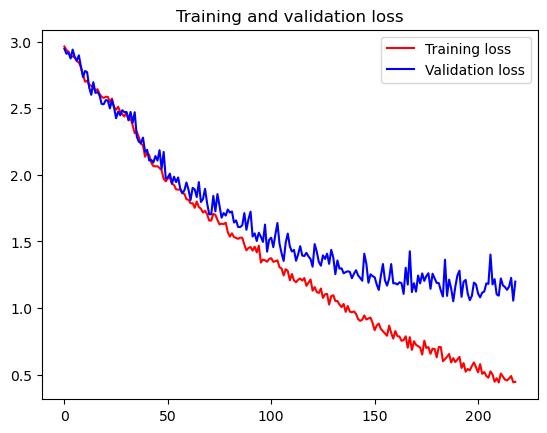

In [66]:
# Display the train and validation loss
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

<h2>Step5: Load the best Model</h>

In [67]:
!ls ./weights/

weights.01-0.08.keras	weights.117-1.58.keras	weights.36-1.31.keras
weights.01-0.09.keras	weights.118-1.54.keras	weights.36-1.90.keras
weights.01-0.26.keras	weights.118-1.55.keras	weights.36-2.29.keras
weights.01-0.30.keras	weights.118-1.61.keras	weights.37-1.30.keras
weights.01-0.38.keras	weights.12-2.59.keras	weights.37-1.91.keras
weights.01-0.40.keras	weights.12-2.67.keras	weights.37-2.25.keras
weights.01-1.00.keras	weights.12-2.68.keras	weights.37-2.27.keras
weights.01-1.33.keras	weights.12-2.69.keras	weights.37-2.35.keras
weights.01-1.72.keras	weights.12-2.92.keras	weights.38-1.86.keras
weights.01-10.39.keras	weights.121-1.31.keras	weights.38-2.24.keras
weights.01-2.34.keras	weights.13-2.63.keras	weights.39-1.83.keras
weights.01-2.78.keras	weights.13-2.64.keras	weights.39-2.17.keras
weights.01-2.85.keras	weights.13-2.65.keras	weights.40-1.13.keras
weights.01-2.87.keras	weights.13-2.79.keras	weights.40-2.10.keras
weights.01-2.91.keras	weights.13-2.99.keras	weights.40-2.17.keras
weig

In [46]:
model_best=tf.keras.models.load_model('./weights/weights.189-1.05.keras')

In [47]:
train_loss, train_accuracy = model_best.evaluate(train_generator, verbose=1)

/opt/conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747181551.820153    2098 service.cc:146] XLA service 0x7fba84011160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747181551.820184    2098 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-05-14 00:12:31.935643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-14 00:12:32.150666: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90701


  7/323 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7911 - loss: 0.7852 

I0000 00:00:1747181555.368711    2098 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


323/323 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7951 - loss: 0.6667


In [48]:
val_loss, val_accuracy = model_best.evaluate(validation_generator, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6591 - loss: 1.1255


In [49]:
test_loss, test_accuracy = model_best.evaluate(test_generator, verbose=1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7591 - loss: 0.8371


In [50]:
import pandas as pd

# Create a DataFrame to report results with updated column order
performance_df = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Accuracy': [train_accuracy, val_accuracy, test_accuracy],
    'Loss': [train_loss, val_loss, test_loss]
})

# Format accuracy as percentages with 2 decimal points
performance_df['Accuracy'] = performance_df['Accuracy'].apply(lambda x: f"{x*100:.2f}%")
performance_df['Loss'] = performance_df['Loss'].apply(lambda x: f"{x:.4f}")

# Display the performance table
print("Customised MiniGoogLeNet Inception Performance:")
display(performance_df)

Customised MiniGoogLeNet Inception Performance:


Dataset Accuracy    Loss
0       Train   79.22%  0.6658
1  Validation   69.62%  1.0499
2        Test   67.45%  1.0656

<h2> Step 6: Check the evaluation result for the best model</h2>

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18
 18 18 18 1

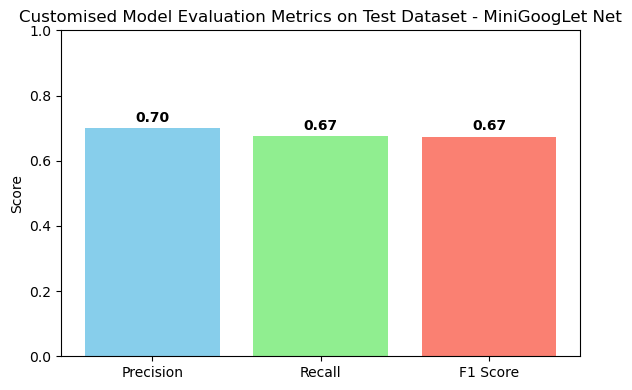

In [51]:
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Get predictions
y_pred_probs = model_best.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels
y_true = test_generator.classes   # works if using ImageDataGenerator

print(y_true)
# Step 3: Compute metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Optional: print full classification report
print(classification_report(y_true, y_pred))

# Step 4: Plot metrics
metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6, 4))
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Customised Model Evaluation Metrics on Test Dataset - MiniGoogLet Net')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()



43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


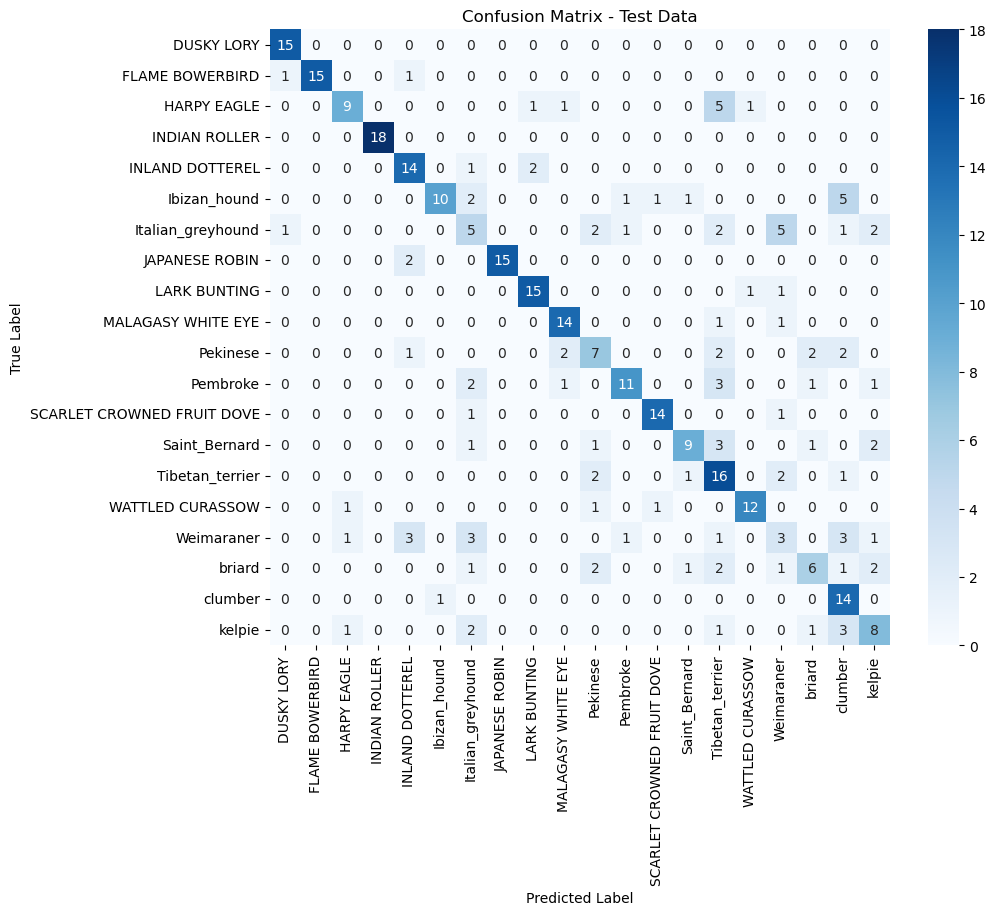

Classification Report:

                            precision    recall  f1-score   support

                DUSKY LORY       0.88      1.00      0.94        15
           FLAME BOWERBIRD       1.00      0.88      0.94        17
               HARPY EAGLE       0.75      0.53      0.62        17
             INDIAN ROLLER       1.00      1.00      1.00        18
           INLAND DOTTEREL       0.67      0.82      0.74        17
              Ibizan_hound       0.91      0.50      0.65        20
         Italian_greyhound       0.28      0.26      0.27        19
            JAPANESE ROBIN       1.00      0.88      0.94        17
              LARK BUNTING       0.83      0.88      0.86        17
        MALAGASY WHITE EYE       0.78      0.88      0.82        16
                  Pekinese       0.47      0.44      0.45        16
                  Pembroke       0.79      0.58      0.67        19
SCARLET CROWNED FRUIT DOVE       0.88      0.88      0.88        16
             Saint_Bern

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get model predictions for validation data
test_predictions = model_best.predict(test_generator, verbose=1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(test_predictions, axis=1)

# Get true class labels
true_classes = test_generator.classes

# Get class label names
class_labels = list(test_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print classification report
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


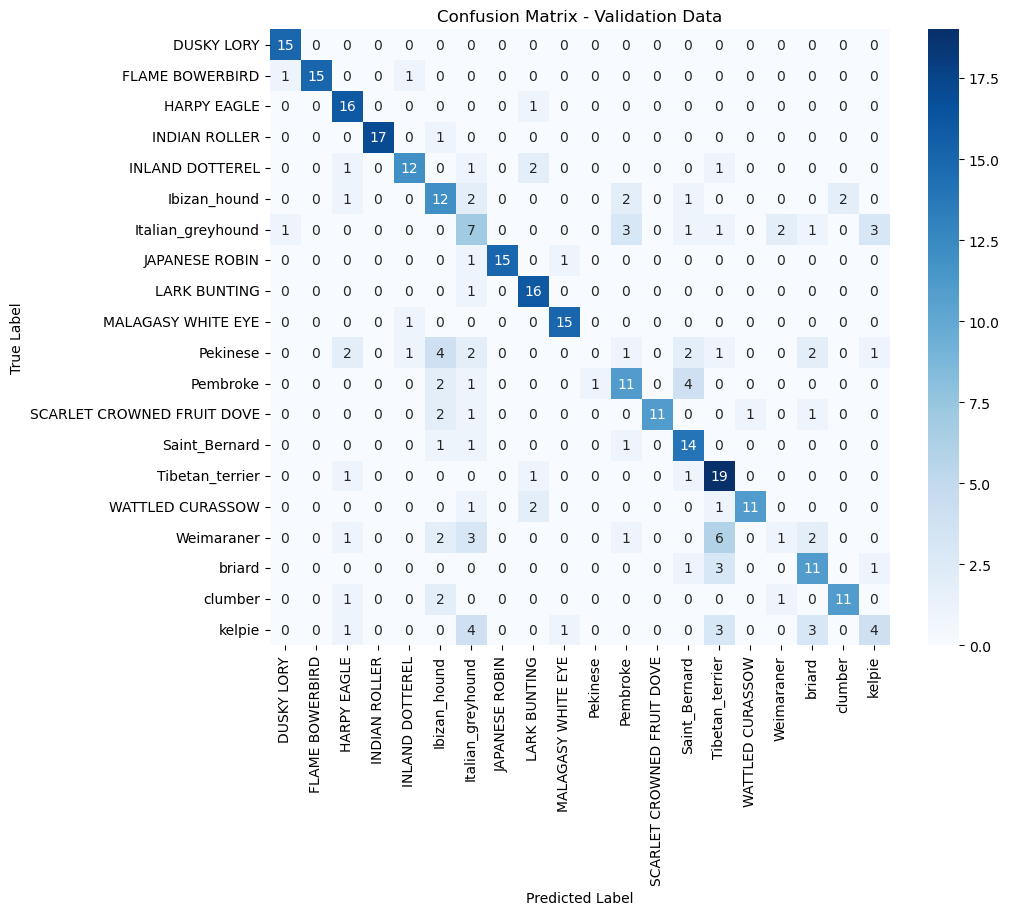

Classification Report:

                            precision    recall  f1-score   support

                DUSKY LORY       0.88      1.00      0.94        15
           FLAME BOWERBIRD       1.00      0.88      0.94        17
               HARPY EAGLE       0.67      0.94      0.78        17
             INDIAN ROLLER       1.00      0.94      0.97        18
           INLAND DOTTEREL       0.80      0.71      0.75        17
              Ibizan_hound       0.46      0.60      0.52        20
         Italian_greyhound       0.28      0.37      0.32        19
            JAPANESE ROBIN       1.00      0.88      0.94        17
              LARK BUNTING       0.73      0.94      0.82        17
        MALAGASY WHITE EYE       0.88      0.94      0.91        16
                  Pekinese       0.00      0.00      0.00        16
                  Pembroke       0.58      0.58      0.58        19
SCARLET CROWNED FRUIT DOVE       1.00      0.69      0.81        16
             Saint_Bern

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get model predictions for validation data
test_predictions = model_best.predict(test_generator, verbose=1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(test_predictions, axis=1)

# Get true class labels
true_classes = test_generator.classes

# Get class label names
class_labels = list(test_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print classification report
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

<h2>Step 7: Visualise result in Test Dataset</h2>

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


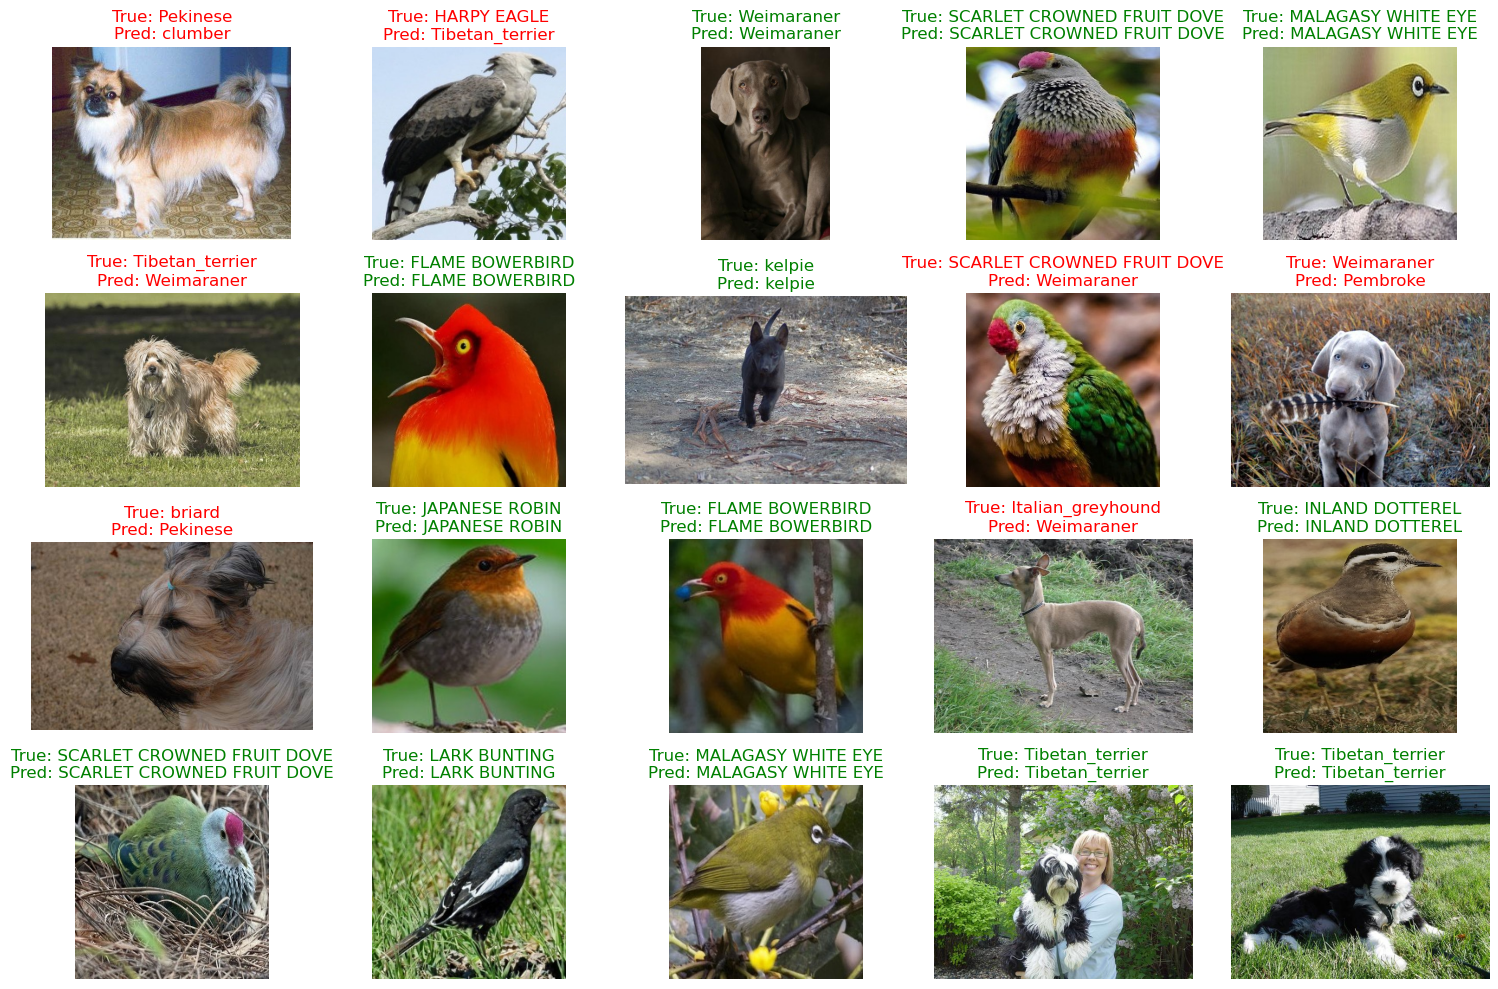

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import array_to_img

# Get class labels
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())

# Step 1: Predict
y_pred_probs = model_best.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels and filenames
y_true = test_generator.classes
filenames = test_generator.filenames

# Step 3: Display random sample predictions
n_images = 20  # number of images to display
indices = random.sample(range(len(filenames)), n_images)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


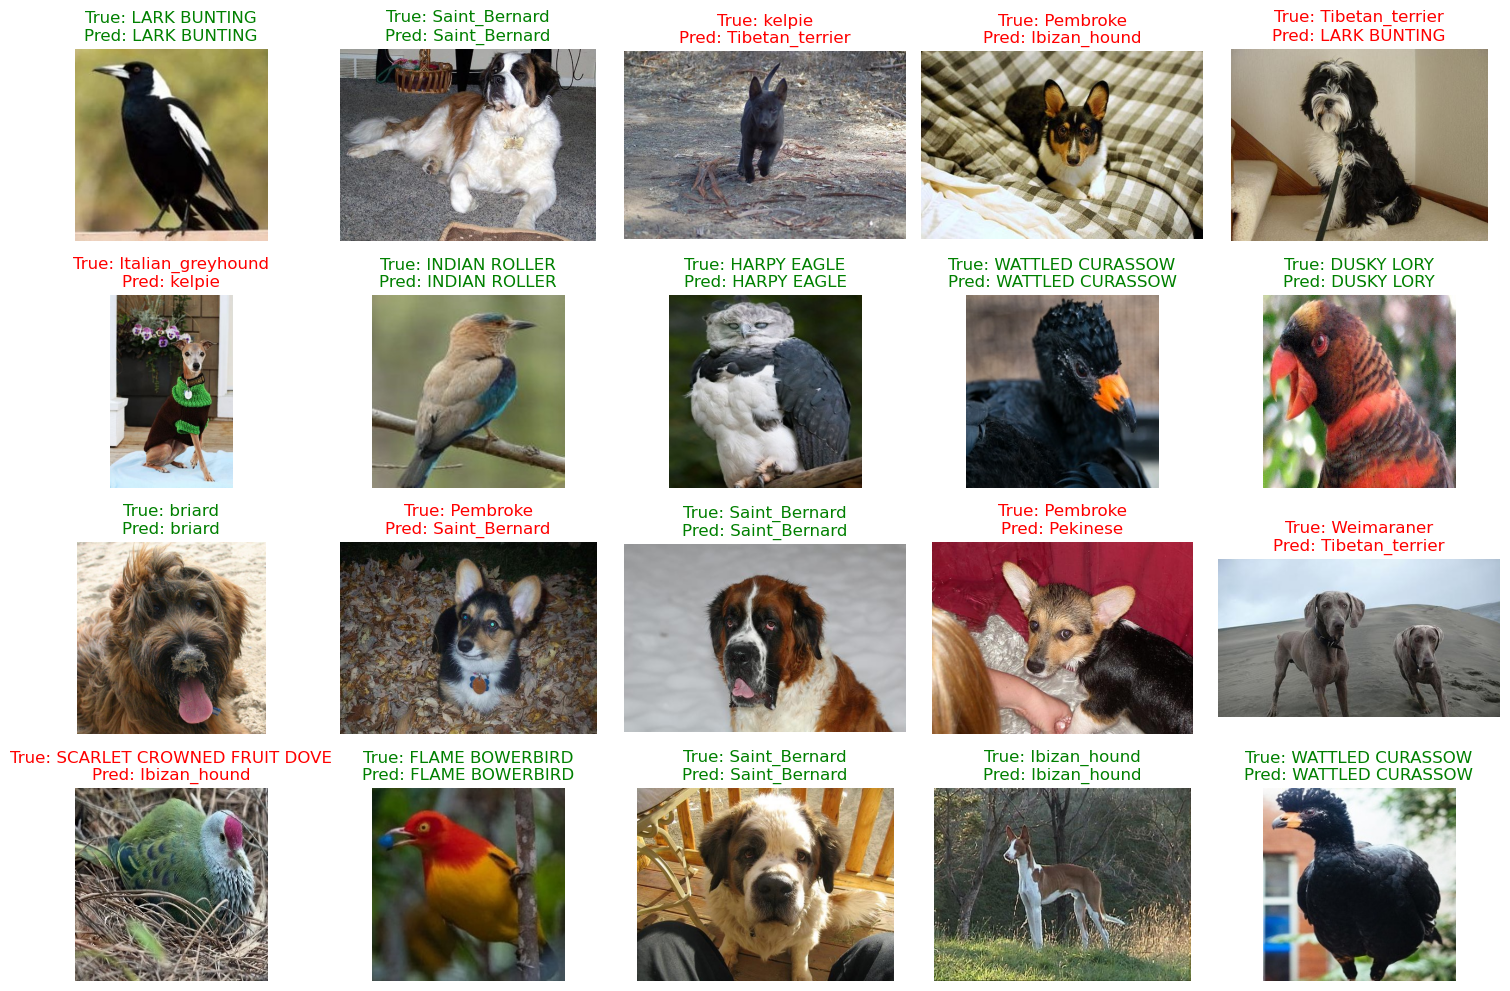

In [69]:
# Get class labels
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())

# Step 1: Predict
y_pred_probs = model_best.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels and filenames
y_true = test_generator.classes
filenames = test_generator.filenames

# Step 3: Display random sample predictions
n_images = 20  # number of images to display
indices = random.sample(range(len(filenames)), n_images)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

<h2> Step8: Show the model Summary and information</h2>

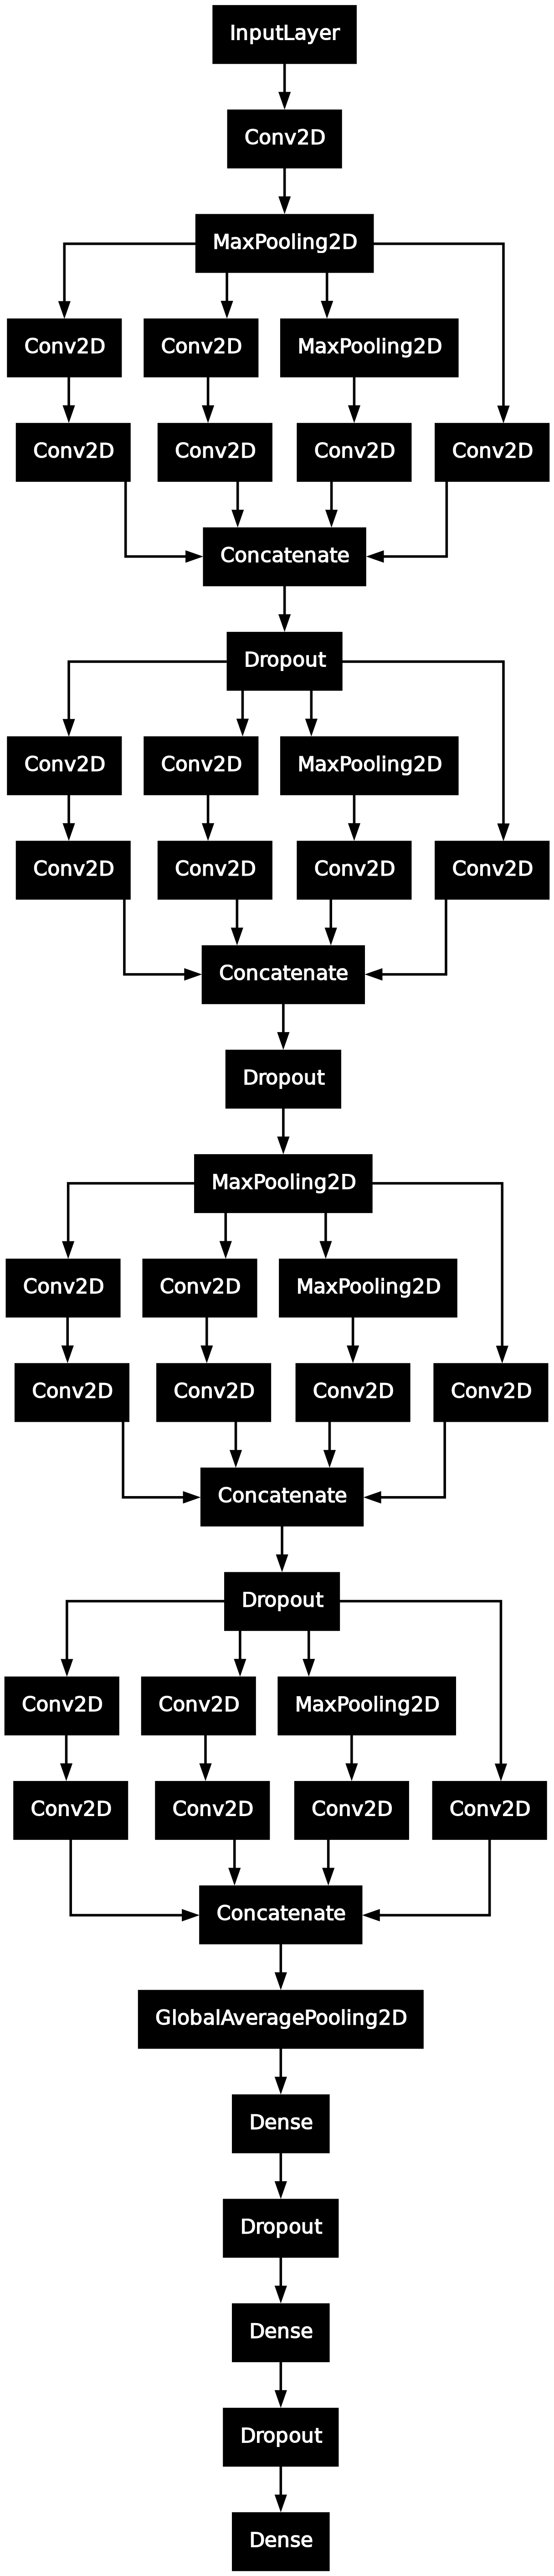

In [48]:
model_img_file = 'MiniGNet-model.png'
tf.keras.utils.plot_model(model_best, to_file=model_img_file,
                          show_shapes=False,
                          show_layer_activations=False,
                          show_dtype=False,
                          show_layer_names=False )

In [49]:
# Using Plot_Model from Keras.Utils
model_img_file = 'MiniGNet-model.png'
tf.keras.utils.plot_model(model_best, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True)

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

In [40]:
!pip install visualkeras

  Using cached visualkeras-0.1.4-py3-none-any.whl.metadata (11 kB)
  Using cached aggdraw-1.3.19-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (655 bytes)
Using cached visualkeras-0.1.4-py3-none-any.whl (17 kB)
Using cached aggdraw-1.3.19-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (997 kB)


/opt/conda/lib/python3.11/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


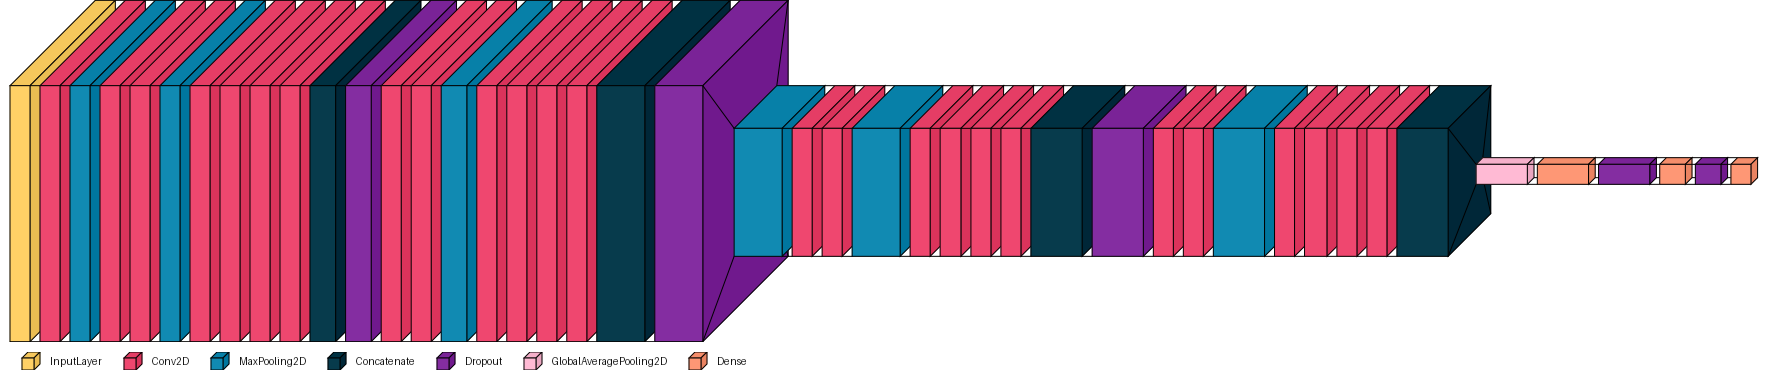

In [41]:
import visualkeras
visualkeras.layered_view(model2,legend=True, draw_volume=True)

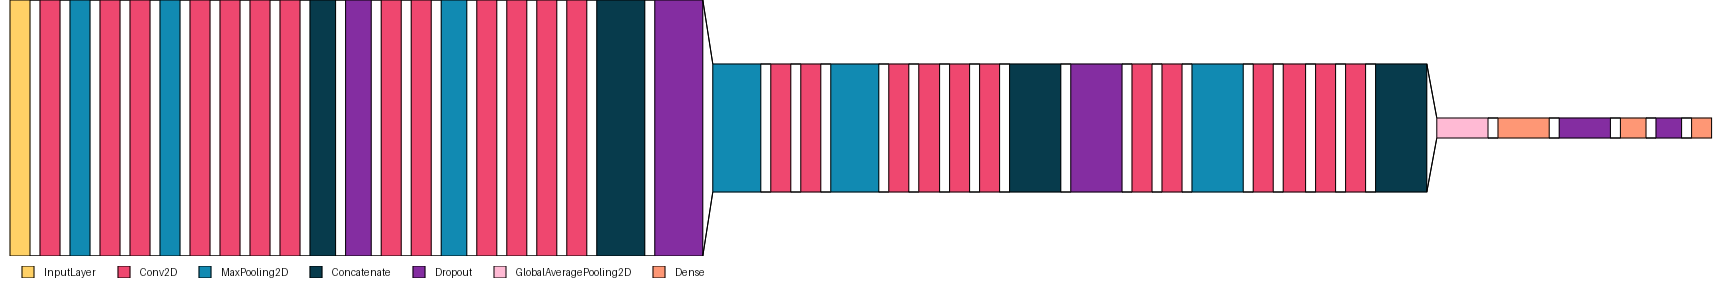

In [42]:
visualkeras.layered_view(model2, legend=True, draw_volume=False)

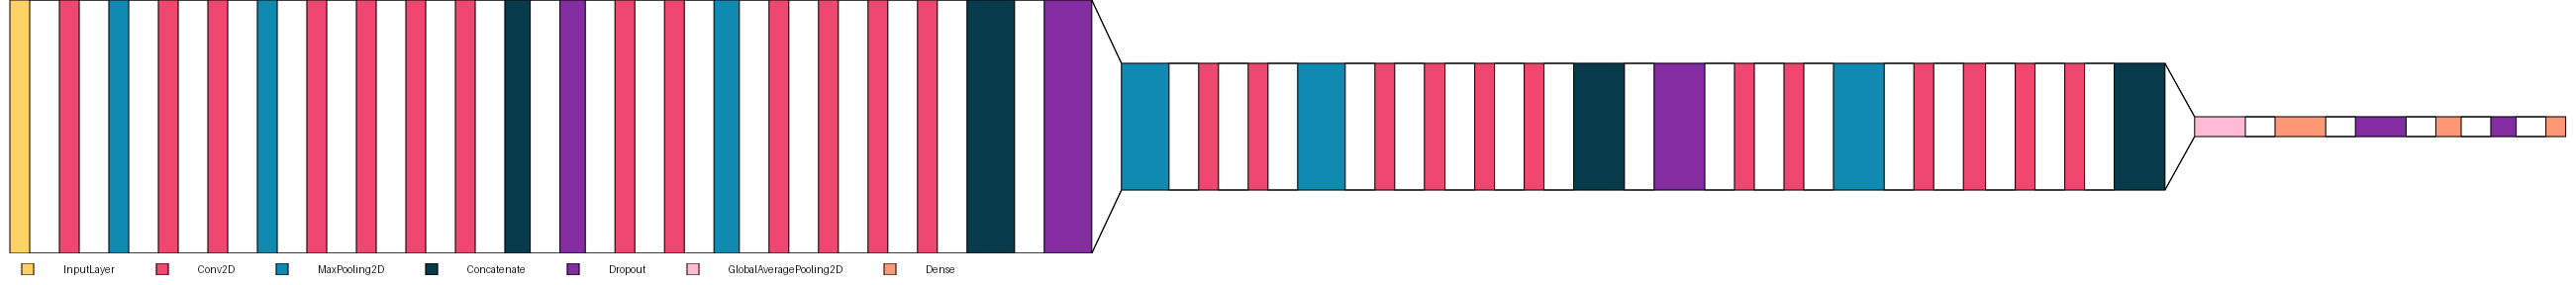

In [43]:
visualkeras.layered_view(model2, legend=True, draw_volume=False,spacing=30)

In [44]:
print(f"Total number of layers: {len(model2.layers)}")

Total number of layers: 45
